In [96]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt

In [97]:
deaths_df = pd.read_csv('./data/time_series_covid19_deaths_US.csv')
crosswalk = pd.read_csv('./data/county-cbsa-crosswalk-cleaned.csv')
crosswalk = crosswalk[['County Code', 'CBSA Code']]
crosswalk.columns = ['FIPS','GTCBSA']
deaths_df = crosswalk.merge(deaths_df, on='FIPS')
filt = ['FIPS', 'UID', 'iso2', 'iso3', 'code3', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key']
deaths_df = deaths_df[[i for i in deaths_df.columns.tolist() if i not in filt]]
deaths_df = deaths_df.groupby('GTCBSA').sum().reset_index()

In [98]:
deaths_df

diff_deaths_df = deaths_df[['GTCBSA','Population','1/22/20']].copy()

cols = deaths_df.columns.tolist()

for idx, col in enumerate(cols):
    if idx >=3:
        diff_deaths_df[col] = deaths_df[col] - deaths_df[cols[idx-1]]
        diff_deaths_df = diff_deaths_df.copy()

In [112]:
dates = diff_deaths_df.columns[2:]
day_of_years = [pd.Period(i, freq='D').day_of_year for i in dates]
years = [pd.Period(i, freq='D').year for i in dates]
week_of_year = [(i//7)+1 for i in day_of_years]
date_df = pd.DataFrame({'date':dates, 'day_of_year':day_of_years, 'week_of_year':week_of_year, 'year':years})
date_df['year-week'] = date_df['year'].astype(str)+'-'+date_df['week_of_year'].astype(str).str.zfill(2)

In [114]:
deaths_df_t = diff_deaths_df.T.reset_index().iloc[2:]
deaths_df_t = deaths_df_t.rename(columns={'index':'date'})
deaths_df_t = date_df.merge(deaths_df_t, on='date')
deaths_df_t = deaths_df_t[deaths_df_t.columns.tolist()[4:]]
deaths_df_t = deaths_df_t.groupby('year-week').sum()#.reset_index()
year_weeks = deaths_df_t.index.tolist()

In [257]:
deaths_df

GTCBSA  Population  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0     10100       42668        0        0        0        0        0        0   
1     10140       75061        0        0        0        0        0        0   
2     10180      172060        0        0        0        0        0        0   
3     10220       38284        0        0        0        0        0        0   
4     10260       19483        0        0        0        0        0        0   
..      ...         ...      ...      ...      ...      ...      ...      ...   
924   49660      536081        0        0        0        0        0        0   
925   49700      175639        0        0        0        0        0        0   
926   49740      213787        0        0        0        0        0        0   
927   49780       86215        0        0        0        0        0        0   
928   49820       14179        0        0        0        0        0        0   

     1/28/20  1/29/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0          0        0  ...      151     152     152     152     152     152   
1          0        0  ...      251     253     253     253     253     253   
2          0        0  ...      947     948     948     948     948     948   
3          0        0  ...      170     170     171     171     171     171   
4          0        0  ...        0       0       0       0       0       0   
..       ...      ...  ...      ...     ...     ...     ...     ...     ...   
924        0        0  ...     2746    2748    2748    2748    2748    2748   
925        0        0  ...      372     372     372     372     372     372   
926        0        0  ...     1253    1256    1256    1256    1256    1256   
927        0        0  ...      324     324     324     324     324     324   
928        0        0  ...       57      57      57      57      57      57   

     3/6/23  3/7/23  3/8/23  3/9/23  
0       152     152     152     152  
1       253     253     253     253  
2       948     948     950     950  
3       171     171     171     171  
4         0       0       0       0  
..      ...     ...     ...     ...  
924    2748    2748    2750    2753  
925     372     372     372     376  
926    1256    1256    1257    1257  
927     324     324     324     324  
928      57      57      57      57  

[929 rows x 1145 columns]

In [115]:
weekly_deaths = deaths_df_t.T

combined_deaths_df = pd.concat([diff_deaths_df, weekly_deaths], axis=1)
combined_deaths_df

GTCBSA  Population  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0     10100       42668        0        0        0        0        0        0   
1     10140       75061        0        0        0        0        0        0   
2     10180      172060        0        0        0        0        0        0   
3     10220       38284        0        0        0        0        0        0   
4     10260       19483        0        0        0        0        0        0   
..      ...         ...      ...      ...      ...      ...      ...      ...   
924   49660      536081        0        0        0        0        0        0   
925   49700      175639        0        0        0        0        0        0   
926   49740      213787        0        0        0        0        0        0   
927   49780       86215        0        0        0        0        0        0   
928   49820       14179        0        0        0        0        0        0   

     1/28/20  1/29/20  ...  2023-01  2023-02  2023-03  2023-04  2023-05  \
0          0        0  ...        0        0        2       -1        0   
1          0        0  ...        1        2        1        0        0   
2          0        0  ...        3        3        6        1        1   
3          0        0  ...        0        0        1        1        1   
4          0        0  ...        0        0        0        0        0   
..       ...      ...  ...      ...      ...      ...      ...      ...   
924        0        0  ...       10        8        6        5        0   
925        0        0  ...        0        2        1        1        0   
926        0        0  ...        6        6        7        3        2   
927        0        0  ...        1        0        2        1        1   
928        0        0  ...        0        0        0        0        1   

     2023-06  2023-07  2023-08  2023-09  2023-10  
0          0        1        0        1        0  
1          1        2        0        2        0  
2          4        0        1        1        2  
3          0        0        0        1        0  
4          0        0        0        0        0  
..       ...      ...      ...      ...      ...  
924        3        1        1        2        5  
925        1        0        0        0        4  
926        1        2        1        3        1  
927        2        0        1        0        0  
928        0        0        0        0        0  

[929 rows x 1311 columns]

In [118]:
weekly_deaths = combined_deaths_df[['GTCBSA','Population']+year_weeks]

weekly_deaths

GTCBSA  Population  2020-04  2020-05  2020-06  2020-07  2020-08  2020-09  \
0     10100       42668        0        0        0        0        0        0   
1     10140       75061        0        0        0        0        0        0   
2     10180      172060        0        0        0        0        0        0   
3     10220       38284        0        0        0        0        0        0   
4     10260       19483        0        0        0        0        0        0   
..      ...         ...      ...      ...      ...      ...      ...      ...   
924   49660      536081        0        0        0        0        0        0   
925   49700      175639        0        0        0        0        0        0   
926   49740      213787        0        0        0        0        0        0   
927   49780       86215        0        0        0        0        0        0   
928   49820       14179        0        0        0        0        0        0   

     2020-10  2020-11  ...  2023-01  2023-02  2023-03  2023-04  2023-05  \
0          0        0  ...        0        0        2       -1        0   
1          0        0  ...        1        2        1        0        0   
2          0        0  ...        3        3        6        1        1   
3          0        0  ...        0        0        1        1        1   
4          0        0  ...        0        0        0        0        0   
..       ...      ...  ...      ...      ...      ...      ...      ...   
924        0        0  ...       10        8        6        5        0   
925        0        0  ...        0        2        1        1        0   
926        0        0  ...        6        6        7        3        2   
927        0        0  ...        1        0        2        1        1   
928        0        0  ...        0        0        0        0        1   

     2023-06  2023-07  2023-08  2023-09  2023-10  
0          0        1        0        1        0  
1          1        2        0        2        0  
2          4        0        1        1        2  
3          0        0        0        1        0  
4          0        0        0        0        0  
..       ...      ...      ...      ...      ...  
924        3        1        1        2        5  
925        1        0        0        0        4  
926        1        2        1        3        1  
927        2        0        1        0        0  
928        0        0        0        0        0  

[929 rows x 168 columns]

There are 2 time scales:
1. New families becoming infected (T_i). 1/T_i  = number of cases ==> proporation to B_i * p_x
2. Once a family is infected & a disease is propagating through a family (t_s, aka the time scale of s)

Assumptions:
1. Pick a geographic unit to study (country, city, etc) -> i (or the proporationality constant associated with a geography)
2. Assume propagation is within the unit
3. x is a last name, n_x is the number of Families with a lastname, p_x is the number of People with the last name, and s_x is the average number of people in a family
4. B_i is a background number- directly proporational or equal to the population number of deaths- i.e. at that point in time, how many cases/deaths there are

If there are s_x people in a typical family x last name, then we would expect a stretch of cases lasting about
s_x \times t_s

To simulate:
n_x families w/ each last name, all the same size
s = size, s_x = family size for last name

Draw family infections from negative binomial
Then simulate within a family using the same basics?

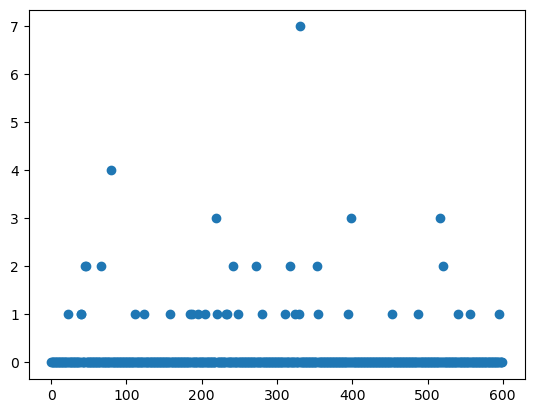

In [251]:
x = [i for i in range(600)]
y = stats.nbinom.rvs(n=0.1, p=0.5, size=len(x))
plt.scatter(x,y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


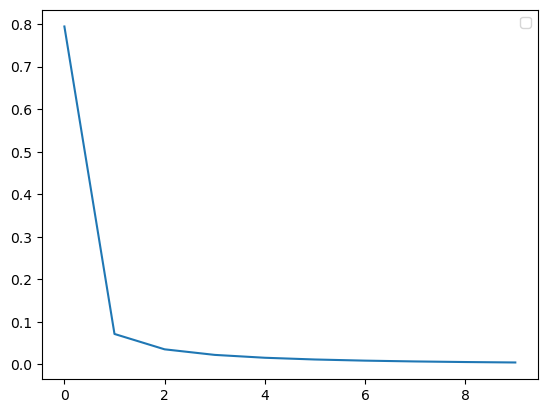

array([0.79432823, 0.07148954, 0.03538732, 0.02229401, 0.01555007,
       0.01147595, 0.00877911, 0.00688533, 0.00549965, 0.00445472])

In [292]:
x = [i for i in range(10)]
y = stats.nbinom.pmf(x, n=0.1, p=0.1)

plt.plot(x,y)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

y

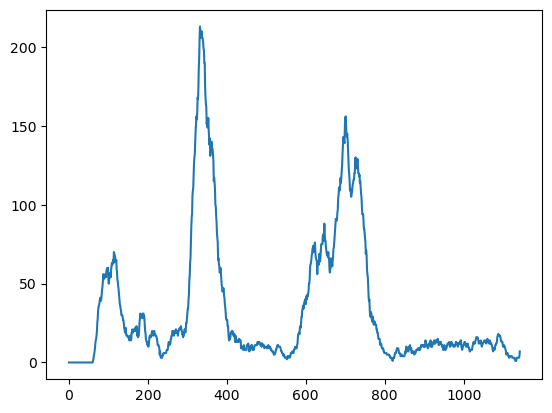

In [320]:
row = 924
nper_window = 14

death_row = diff_deaths_df.iloc[row:row+1]
death_vector = death_row.T[row].tolist()[2:]

death_rolling_sum = [sum(death_vector[max(0, i-nper_window+1):i+1]) for i in range(len(death_vector))]
#plt.hist(death_rolling_sum)
plt.plot([i for i in range(len(death_rolling_sum))], death_rolling_sum)

In [253]:
quant_x = 1
n_x = 10
s_x = 10
p_x = n_x * s_x

B_i = 0.01

lns = []
nxs = []
sxs = []

for i in range(quant_x):
    for j in range(n_x):
        lns.append(i)
        nxs.append(j)
        sxs.append(s_x)

simu_df = pd.DataFrame({'ln':lns, 'family':nxs, 'individual':sxs})
simu_df

ln  family  individual
0   0       0          10
1   0       1          10
2   0       2          10
3   0       3          10
4   0       4          10
5   0       5          10
6   0       6          10
7   0       7          10
8   0       8          10
9   0       9          10

In [276]:
cbsa = 49660
diff_deaths_df[diff_deaths_df['GTCBSA']==cbsa][diff_deaths_df.columns[2:]]

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
924        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
924        0        0  ...        0       2       0       0       0       0   

     3/6/23  3/7/23  3/8/23  3/9/23  
924       0       0       2       3  

[1 rows x 1143 columns]